# Travel Package Purchase Prediction

### Problem Definition
Tourism company "Visit With Us" is planning to launch a new product called the Wellness Tourism Package. This new package is defined as travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. The company would like to harness the available data of existing and potential customers to make the marketing expenditure for the new product more efficient.

### Objective
Analyze customer data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential target customer who would purchase the newly introduced travel package.

### Data Dictionary / Feature Info 

#### Customer Details:
- CustomerID: Unique customer ID
- ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
- Age: Age of customer
- TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
- CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
- Occupation: Occupation of customer
- Gender: Gender of customer
- NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
- PreferredPropertyStar: Preferred hotel property rating by customer
- MaritalStatus: Marital status of customer
- NumberOfTrips: Average number of trips in a year by customer
- Passport: The customer has a passport or not (0: No, 1: Yes)
- OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
- NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
- Designation: Designation of the customer in the current organization
- MonthlyIncome: Gross monthly income of the customer

#### Customer Interaction Data: 
- PitchSatisfactionScore: Sales pitch satisfaction score
- ProductPitched: Product pitched by the salesperson
- NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
- DurationOfPitch: Duration of the pitch by a salesperson to the customer

## Import Pertinent Libraries

In [1]:
!pip install xgboost

In [2]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 500)

# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

## Inspect Dataset Structure

In [3]:
traveler = pd.read_excel('Tourism.xlsx', sheet_name='Tourism')   # load dataset

In [4]:
data = traveler.copy()   # copy data to another variable to avoid changes to original data

In [5]:
print(f"Dataset has {data.shape[0]} rows and {data.shape[1]} columns")   # check data shape

Dataset has 4888 rows and 20 columns


In [6]:
data.head()   # check first 5 rows

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [7]:
data.tail()   # check last 5 rows

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


In [8]:
data.sample(10)   # check saple of 10 rows

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
2206,202206,0,48.0,Self Enquiry,1,10.0,Salaried,Male,3,4.0,Standard,3.0,Unmarried,1.0,0,5,1,0.0,Senior Manager,25999.0
1405,201405,0,31.0,Company Invited,1,16.0,Small Business,Female,2,3.0,Standard,3.0,Married,5.0,0,1,1,1.0,Senior Manager,26031.0
289,200289,0,28.0,Self Enquiry,1,14.0,Salaried,Female,3,3.0,Basic,3.0,Single,2.0,0,4,0,1.0,Executive,18310.0
1016,201016,1,31.0,Self Enquiry,1,14.0,Salaried,Female,2,4.0,Basic,4.0,Single,2.0,0,4,0,1.0,Executive,16261.0
2573,202573,0,50.0,Self Enquiry,1,27.0,Small Business,Female,4,4.0,Deluxe,5.0,Divorced,3.0,0,2,1,3.0,Manager,25245.0
3693,203693,1,30.0,Self Enquiry,3,16.0,Small Business,Female,3,6.0,Basic,4.0,Unmarried,3.0,0,1,1,2.0,Executive,21438.0
1167,201167,1,35.0,Self Enquiry,3,21.0,Small Business,Male,2,5.0,Deluxe,3.0,Married,7.0,1,1,1,1.0,Manager,20440.0
3919,203919,0,33.0,Company Invited,1,9.0,Salaried,Male,4,4.0,Basic,3.0,Unmarried,2.0,0,3,1,2.0,Executive,21746.0
2310,202310,0,35.0,Self Enquiry,1,6.0,Small Business,Male,2,4.0,Basic,3.0,Married,7.0,0,1,1,1.0,Executive,17258.0
2057,202057,0,52.0,Self Enquiry,1,17.0,Salaried,Female,2,3.0,Deluxe,3.0,Married,1.0,0,1,1,0.0,Manager,18149.0


In [9]:
data.info()   # check missing values and datatypes for each feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [10]:
data.describe().T   # review initial statistical summary

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


#### Observations
- There are missing values in many of the columns though small compared to dataset size; impute with median/mode values. 
- There are no problematic outliers; data for each feature looks within reasonable range therefore no need for outlier treatment. 

## Data Preprocessing

In [11]:
data.isnull().sum()   # confirm missing values for each feature

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [12]:
# since missing value counts are relatively small, impute with median/mode values as appropriate.

data['Age'] = data['Age'].fillna(data['Age'].median())
data['DurationOfPitch'] = data['DurationOfPitch'].fillna(data['DurationOfPitch'].median())
data['NumberOfFollowups'] = data['NumberOfFollowups'].fillna(data['NumberOfFollowups'].median())
data['PreferredPropertyStar'] = data['PreferredPropertyStar'].fillna(data['PreferredPropertyStar'].median())
data['NumberOfTrips'] = data['NumberOfTrips'].fillna(data['NumberOfTrips'].median())
data['NumberOfChildrenVisiting'] = data['NumberOfChildrenVisiting'].fillna(data['NumberOfChildrenVisiting'].median())
data['MonthlyIncome'] = data['MonthlyIncome'].fillna(data['MonthlyIncome'].median())

data['TypeofContact'] = data['TypeofContact'].fillna(data['TypeofContact'].mode().iloc[0])

In [13]:
data.info()   # confirm no missing values after imputation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4888 non-null   float64
 3   TypeofContact             4888 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4888 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4888 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4888 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4888 non-null   float64
 14  Passport

In [14]:
# check unique value counts for classes in each feature

for columns in data:
    print("Unique values in column", columns, ":")
    print(data[columns].value_counts())
    print("-" * 40)

Unique values in column CustomerID :
204800    1
204253    1
200167    1
204261    1
202212    1
         ..
203522    1
201471    1
203518    1
201467    1
200702    1
Name: CustomerID, Length: 4888, dtype: int64
----------------------------------------
Unique values in column ProdTaken :
0    3968
1     920
Name: ProdTaken, dtype: int64
----------------------------------------
Unique values in column Age :
36.0    457
35.0    237
34.0    211
31.0    203
30.0    199
32.0    197
33.0    189
37.0    185
29.0    178
38.0    176
41.0    155
39.0    150
28.0    147
40.0    146
42.0    142
27.0    138
43.0    130
46.0    121
45.0    116
26.0    106
44.0    105
51.0     90
47.0     88
50.0     86
25.0     74
52.0     68
53.0     66
48.0     65
49.0     65
55.0     64
54.0     61
56.0     58
24.0     56
22.0     46
23.0     46
59.0     44
21.0     41
20.0     38
19.0     32
58.0     31
60.0     29
57.0     29
18.0     14
61.0      9
Name: Age, dtype: int64
------------------------------------

In [15]:
data.loc[data['Gender'] == 'Fe Male','Gender'] = 'Female'   # resolve discrepancy

In [16]:
data['Gender'].value_counts()   # check corrected unique value count

Male      2916
Female    1972
Name: Gender, dtype: int64

In [17]:
data.info()   # check datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4888 non-null   float64
 3   TypeofContact             4888 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4888 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4888 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4888 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4888 non-null   float64
 14  Passport

In [18]:
data.drop('CustomerID', axis=1, inplace=True)   # drop ID column since no analytical value

In [19]:
# convert all categorical features from "object" to "category" type

cat_cols = ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']
data[cat_cols] = data[cat_cols].astype('category')

In [20]:
# convert numerical features from "float" to "int" type

flt_cols = ['Age', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'NumberOfChildrenVisiting', 'MonthlyIncome']
data[flt_cols] = data[flt_cols].astype('int64')

In [21]:
data.info()   # confirm datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   int64   
 1   Age                       4888 non-null   int64   
 2   TypeofContact             4888 non-null   category
 3   CityTier                  4888 non-null   int64   
 4   DurationOfPitch           4888 non-null   int64   
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4888 non-null   int64   
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4888 non-null   int64   
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4888 non-null   int64   
 13  Passport                  4888 non-null   int64 

## Exploratory Data Analysis

### Univariate Analysis

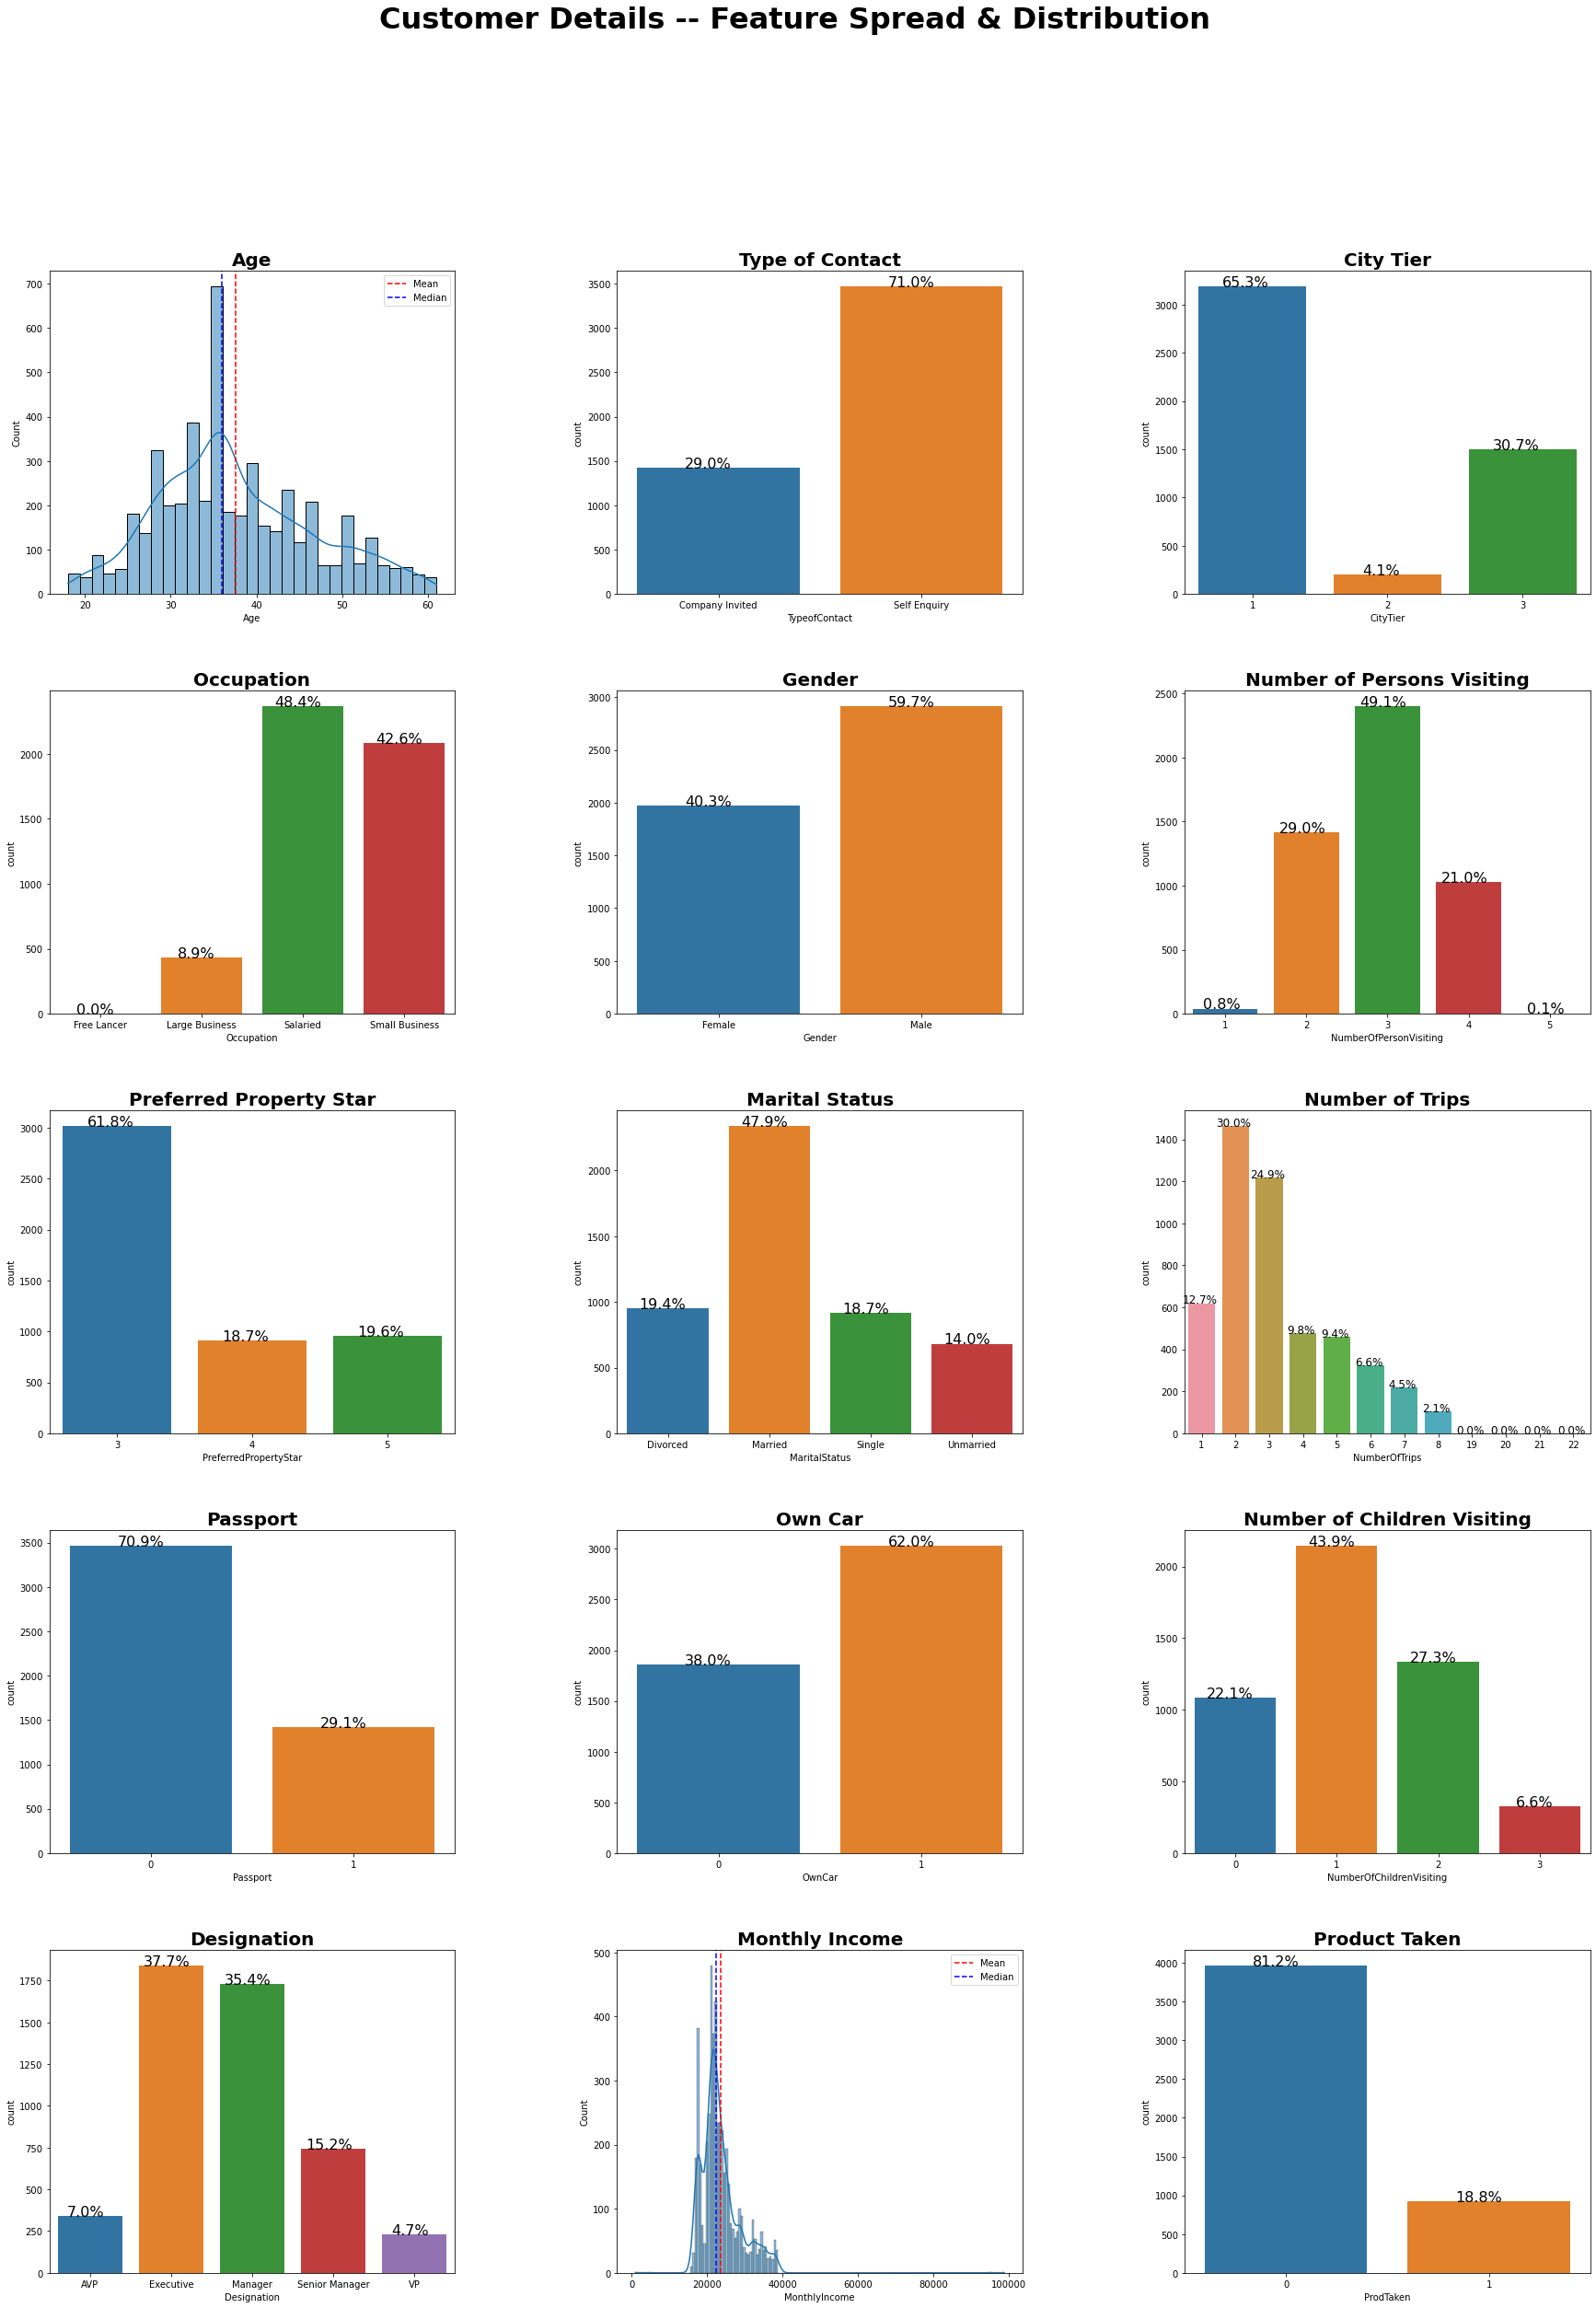

In [22]:
# create distribution plots for all features numerical and categorical
# create 5x3-grid master plot with 14 subplots

uvplot1 = plt.figure(figsize=[30,40])   
uvplot1.subplots_adjust(hspace=0.3, wspace=0.4)
uvplot1.suptitle("Customer Details -- Feature Spread & Distribution", fontweight='bold', fontsize='32')

uvfeat0 = uvplot1.add_subplot(5,3,1)
sns.histplot(data.Age, kde=True, ax=uvfeat0);
uvfeat0.set_title('Age', fontweight='bold', fontsize='20')
uvfeat0.axvline(data['Age'].mean(), color='red', linestyle='--', label='Mean')
uvfeat0.axvline(data['Age'].median(), color='blue', linestyle='--', label='Median')
uvfeat0.legend()

uvfeat1 = uvplot1.add_subplot(5,3,2)
ax1 = sns.countplot(x='TypeofContact', data=data, ax=uvfeat1);
uvfeat1.set_title('Type of Contact', fontweight='bold', fontsize='20')
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(data['TypeofContact']))
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    plt.annotate(percentage, (x, y), ha='center', fontsize='16')

uvfeat2 = uvplot1.add_subplot(5,3,3)
ax2 = sns.countplot(x='CityTier', data=data, ax=uvfeat2);
uvfeat2.set_title('City Tier', fontweight='bold', fontsize='20')
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(data['CityTier']))
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    plt.annotate(percentage, (x, y), ha='center', fontsize='16')

uvfeat3 = uvplot1.add_subplot(5,3,4)
ax3 = sns.countplot(x='Occupation', data=data, ax=uvfeat3);
uvfeat3.set_title('Occupation', fontweight='bold', fontsize='20')
for p in ax3.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(data['Occupation']))
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    plt.annotate(percentage, (x, y), ha='center', fontsize='16')

uvfeat4 = uvplot1.add_subplot(5,3,5)
ax4 = sns.countplot(x='Gender', data=data, ax=uvfeat4);
uvfeat4.set_title('Gender', fontweight='bold', fontsize='20')
for p in ax4.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(data['Gender']))
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    plt.annotate(percentage, (x, y), ha='center', fontsize='16')

uvfeat5 = uvplot1.add_subplot(5,3,6)
ax5 = sns.countplot(x='NumberOfPersonVisiting', data=data, ax=uvfeat5);
uvfeat5.set_title('Number of Persons Visiting', fontweight='bold', fontsize='20')
for p in ax5.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(data['NumberOfPersonVisiting']))
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    plt.annotate(percentage, (x, y), ha='center', fontsize='16')

uvfeat6 = uvplot1.add_subplot(5,3,7)
ax6 = sns.countplot(x='PreferredPropertyStar', data=data, ax=uvfeat6);
uvfeat6.set_title('Preferred Property Star', fontweight='bold', fontsize='20')
for p in ax6.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(data['PreferredPropertyStar']))
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    plt.annotate(percentage, (x, y), ha='center', fontsize='16')
    
uvfeat7 = uvplot1.add_subplot(5,3,8)
ax7 = sns.countplot(x='MaritalStatus', data=data, ax=uvfeat7);
uvfeat7.set_title('Marital Status', fontweight='bold', fontsize='20')
for p in ax7.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(data['MaritalStatus']))
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    plt.annotate(percentage, (x, y), ha='center', fontsize='16')

uvfeat8 = uvplot1.add_subplot(5,3,9)
ax8 = sns.countplot(x='NumberOfTrips', data=data, ax=uvfeat8);
uvfeat8.set_title('Number of Trips', fontweight='bold', fontsize='20')
for p in ax8.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(data['NumberOfTrips']))
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    plt.annotate(percentage, (x, y), ha='center', fontsize='12')

uvfeat9 = uvplot1.add_subplot(5,3,10)
ax9 = sns.countplot(x='Passport', data=data, ax=uvfeat9);
uvfeat9.set_title('Passport', fontweight='bold', fontsize='20')
for p in ax9.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(data['Passport']))
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    plt.annotate(percentage, (x, y), ha='center', fontsize='16')

uvfeat10 = uvplot1.add_subplot(5,3,11)
ax10 = sns.countplot(x='OwnCar', data=data, ax=uvfeat10);
uvfeat10.set_title('Own Car', fontweight='bold', fontsize='20')
for p in ax10.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(data['OwnCar']))
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    plt.annotate(percentage, (x, y), ha='center', fontsize='16')

uvfeat11 = uvplot1.add_subplot(5,3,12)
ax11 = sns.countplot(x='NumberOfChildrenVisiting', data=data, ax=uvfeat11);
uvfeat11.set_title('Number of Children Visiting', fontweight='bold', fontsize='20')
for p in ax11.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(data['NumberOfChildrenVisiting']))
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    plt.annotate(percentage, (x, y), ha='center', fontsize='16')

uvfeat12 = uvplot1.add_subplot(5,3,13)
ax12 = sns.countplot(x='Designation', data=data, ax=uvfeat12);
uvfeat12.set_title('Designation', fontweight='bold', fontsize='20')
for p in ax12.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(data['Designation']))
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    plt.annotate(percentage, (x,y), ha='center', fontsize='16')
    
uvfeat13 = uvplot1.add_subplot(5,3,14)
sns.histplot(data.MonthlyIncome, kde=True, ax=uvfeat13);
uvfeat13.set_title('Monthly Income', fontweight='bold', fontsize='20')
uvfeat13.axvline(data['MonthlyIncome'].mean(), color='red', linestyle='--', label='Mean')
uvfeat13.axvline(data['MonthlyIncome'].median(), color='blue', linestyle='--', label='Median')
uvfeat13.legend()

uvfeat14 = uvplot1.add_subplot(5,3,15)
ax14 = sns.countplot(x='ProdTaken', data=data, ax=uvfeat14);
uvfeat14.set_title('Product Taken', fontweight='bold', fontsize='20')
for p in ax14.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(data['ProdTaken']))
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    plt.annotate(percentage, (x,y), ha='center', fontsize='16')

plt.show()

#### Observations
- Average age is about 38 with min 18 and max 61. 
- Over 70% of customers self-inquired. 
- Majority of customers come from City Tier 1.
- Majority are salaried and/or have a small business. 
- Male/Female ratio is about 60/40.
- Majority of customers prefer properties with 3 star rating. 
- Majority of customers are married. 
- Most customers inclined to take 2-3 trips per year. 
- Only 29% have a passport, so most travel domestically. 
- Over 60% own a car. 
- Majority of customers have atleast 1-2 children. 
- Average monthly income is about 23000. 

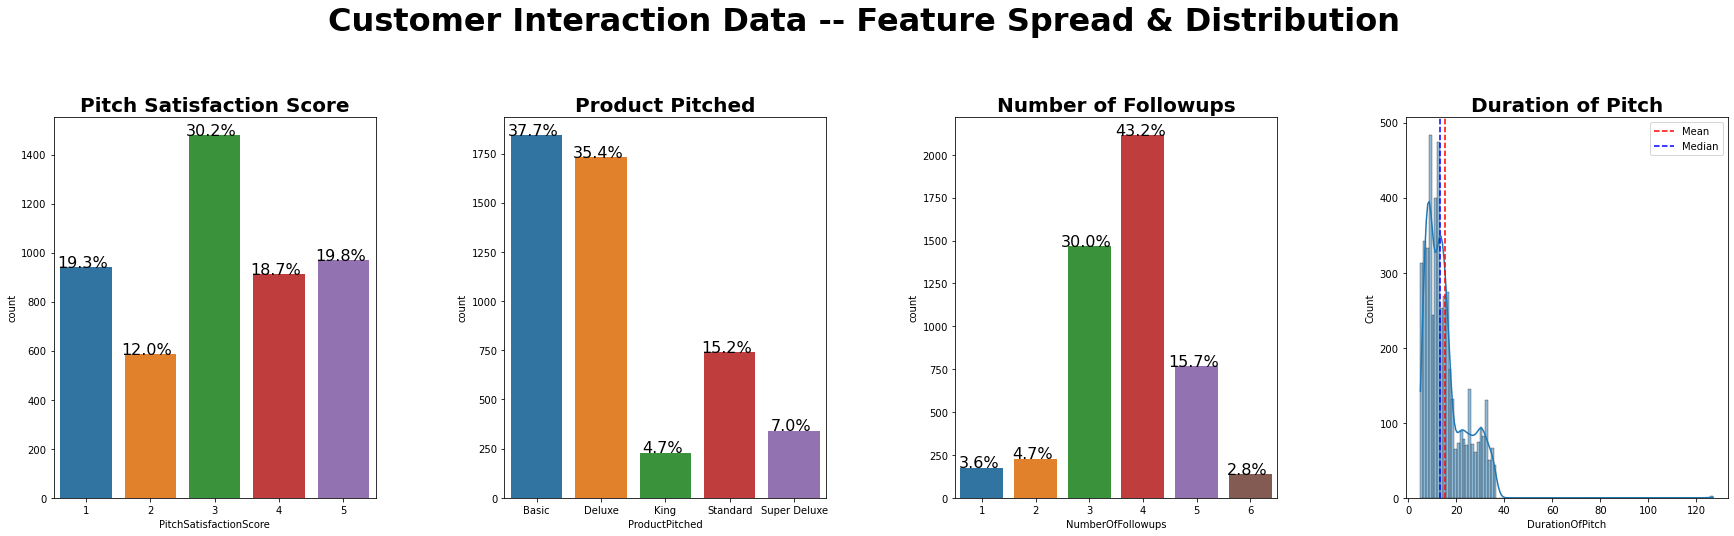

In [23]:
# create distribution plots for all features numerical and categorical
# create 1x4-grid master plot with 4 subplots

uvplot2 = plt.figure(figsize=[30,7])   
uvplot2.subplots_adjust(hspace=0.4, wspace=0.4)
uvplot2.suptitle("Customer Interaction Data -- Feature Spread & Distribution", fontweight='bold', fontsize='32', y='1.1')

uvfeat15 = uvplot2.add_subplot(1,4,1)
ax15 = sns.countplot(x='PitchSatisfactionScore', data=data, ax=uvfeat15);
uvfeat15.set_title('Pitch Satisfaction Score', fontweight='bold', fontsize='20')
for p in ax15.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(data['PitchSatisfactionScore']))
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    plt.annotate(percentage, (x, y), ha='center', fontsize='16')

uvfeat16 = uvplot2.add_subplot(1,4,2)
ax16 = sns.countplot(x='ProductPitched', data=data, ax=uvfeat16);
uvfeat16.set_title('Product Pitched', fontweight='bold', fontsize='20')
for p in ax16.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(data['ProductPitched']))
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    plt.annotate(percentage, (x, y), ha='center', fontsize='16')

uvfeat17 = uvplot2.add_subplot(1,4,3)
ax17 = sns.countplot(x='NumberOfFollowups', data=data, ax=uvfeat17);
uvfeat17.set_title('Number of Followups', fontweight='bold', fontsize='20')
for p in ax17.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(data['NumberOfFollowups']))
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    plt.annotate(percentage, (x, y), ha='center', fontsize='16')
    
uvfeat18 = uvplot2.add_subplot(1,4,4)
sns.histplot(data.DurationOfPitch, kde=True, ax=uvfeat18);
uvfeat18.set_title('Duration of Pitch', fontweight='bold', fontsize='20')
uvfeat18.axvline(data['DurationOfPitch'].mean(), color='red', linestyle='--', label='Mean')
uvfeat18.axvline(data['DurationOfPitch'].median(), color='blue', linestyle='--', label='Median')
uvfeat18.legend()
    
plt.show()

#### Observations
- Over 30% of customers showed average satisfaction with product pitch. 
- Most customers were pitched Basic and Deluxe packages. 
- Most number of followups were 3-4. 
- Average duration of pitch was about 15 minutes. 

### Bivariate Analysis

In [24]:
data.corr().round(3)   # check pairwise correlation

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
ProdTaken,1.000,-0.144,0.087,0.076,0.010,0.112,0.099,0.020,0.261,0.051,-0.012,0.008,-0.126
Age,-0.144,1.000,-0.013,-0.006,0.018,0.002,-0.016,0.175,0.032,0.017,0.047,0.008,0.461
CityTier,0.087,-0.013,1.000,0.019,-0.002,0.024,-0.008,-0.029,0.002,-0.042,0.004,0.001,0.052
DurationOfPitch,0.076,-0.006,0.019,1.000,0.073,0.016,-0.005,0.014,0.034,-0.003,-0.003,0.038,0.003
NumberOfPersonVisiting,0.010,0.018,-0.002,0.073,1.000,0.325,0.031,0.190,0.011,-0.020,0.010,0.606,0.198
NumberOfFollowups,0.112,0.002,0.024,0.016,0.325,1.000,-0.027,0.135,0.004,0.004,0.012,0.282,0.176
PreferredPropertyStar,0.099,-0.016,-0.008,-0.005,0.031,-0.027,1.000,0.009,0.001,-0.024,0.014,0.031,-0.001
NumberOfTrips,0.020,0.175,-0.029,0.014,0.190,0.135,0.009,1.000,0.013,-0.005,-0.012,0.161,0.115
Passport,0.261,0.032,0.002,0.034,0.011,0.004,0.001,0.013,1.000,0.003,-0.022,0.020,0.003
PitchSatisfactionScore,0.051,0.017,-0.042,-0.003,-0.020,0.004,-0.024,-0.005,0.003,1.000,0.069,0.000,0.029


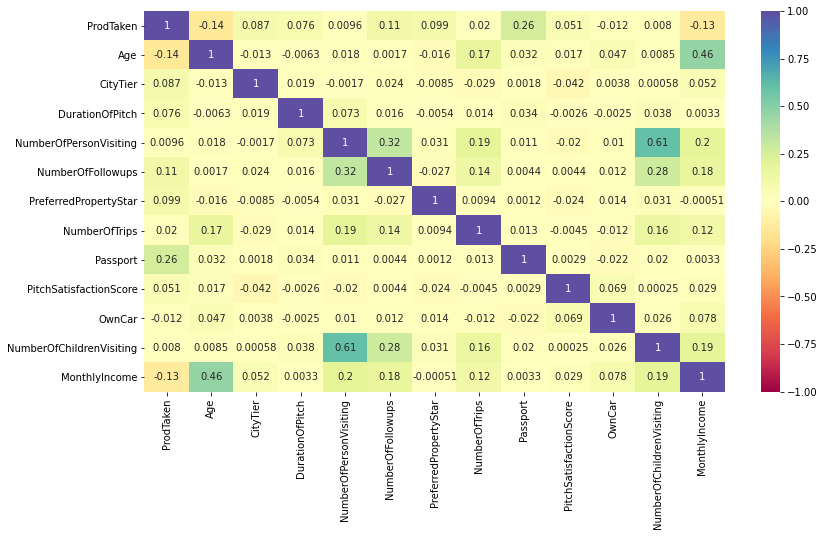

In [25]:
plt.figure(figsize=[13,7])
sns.heatmap(data.corr(),annot=True, vmin=-1, vmax=1, cmap='Spectral')   # generate heatmap based on correlation
plt.show()

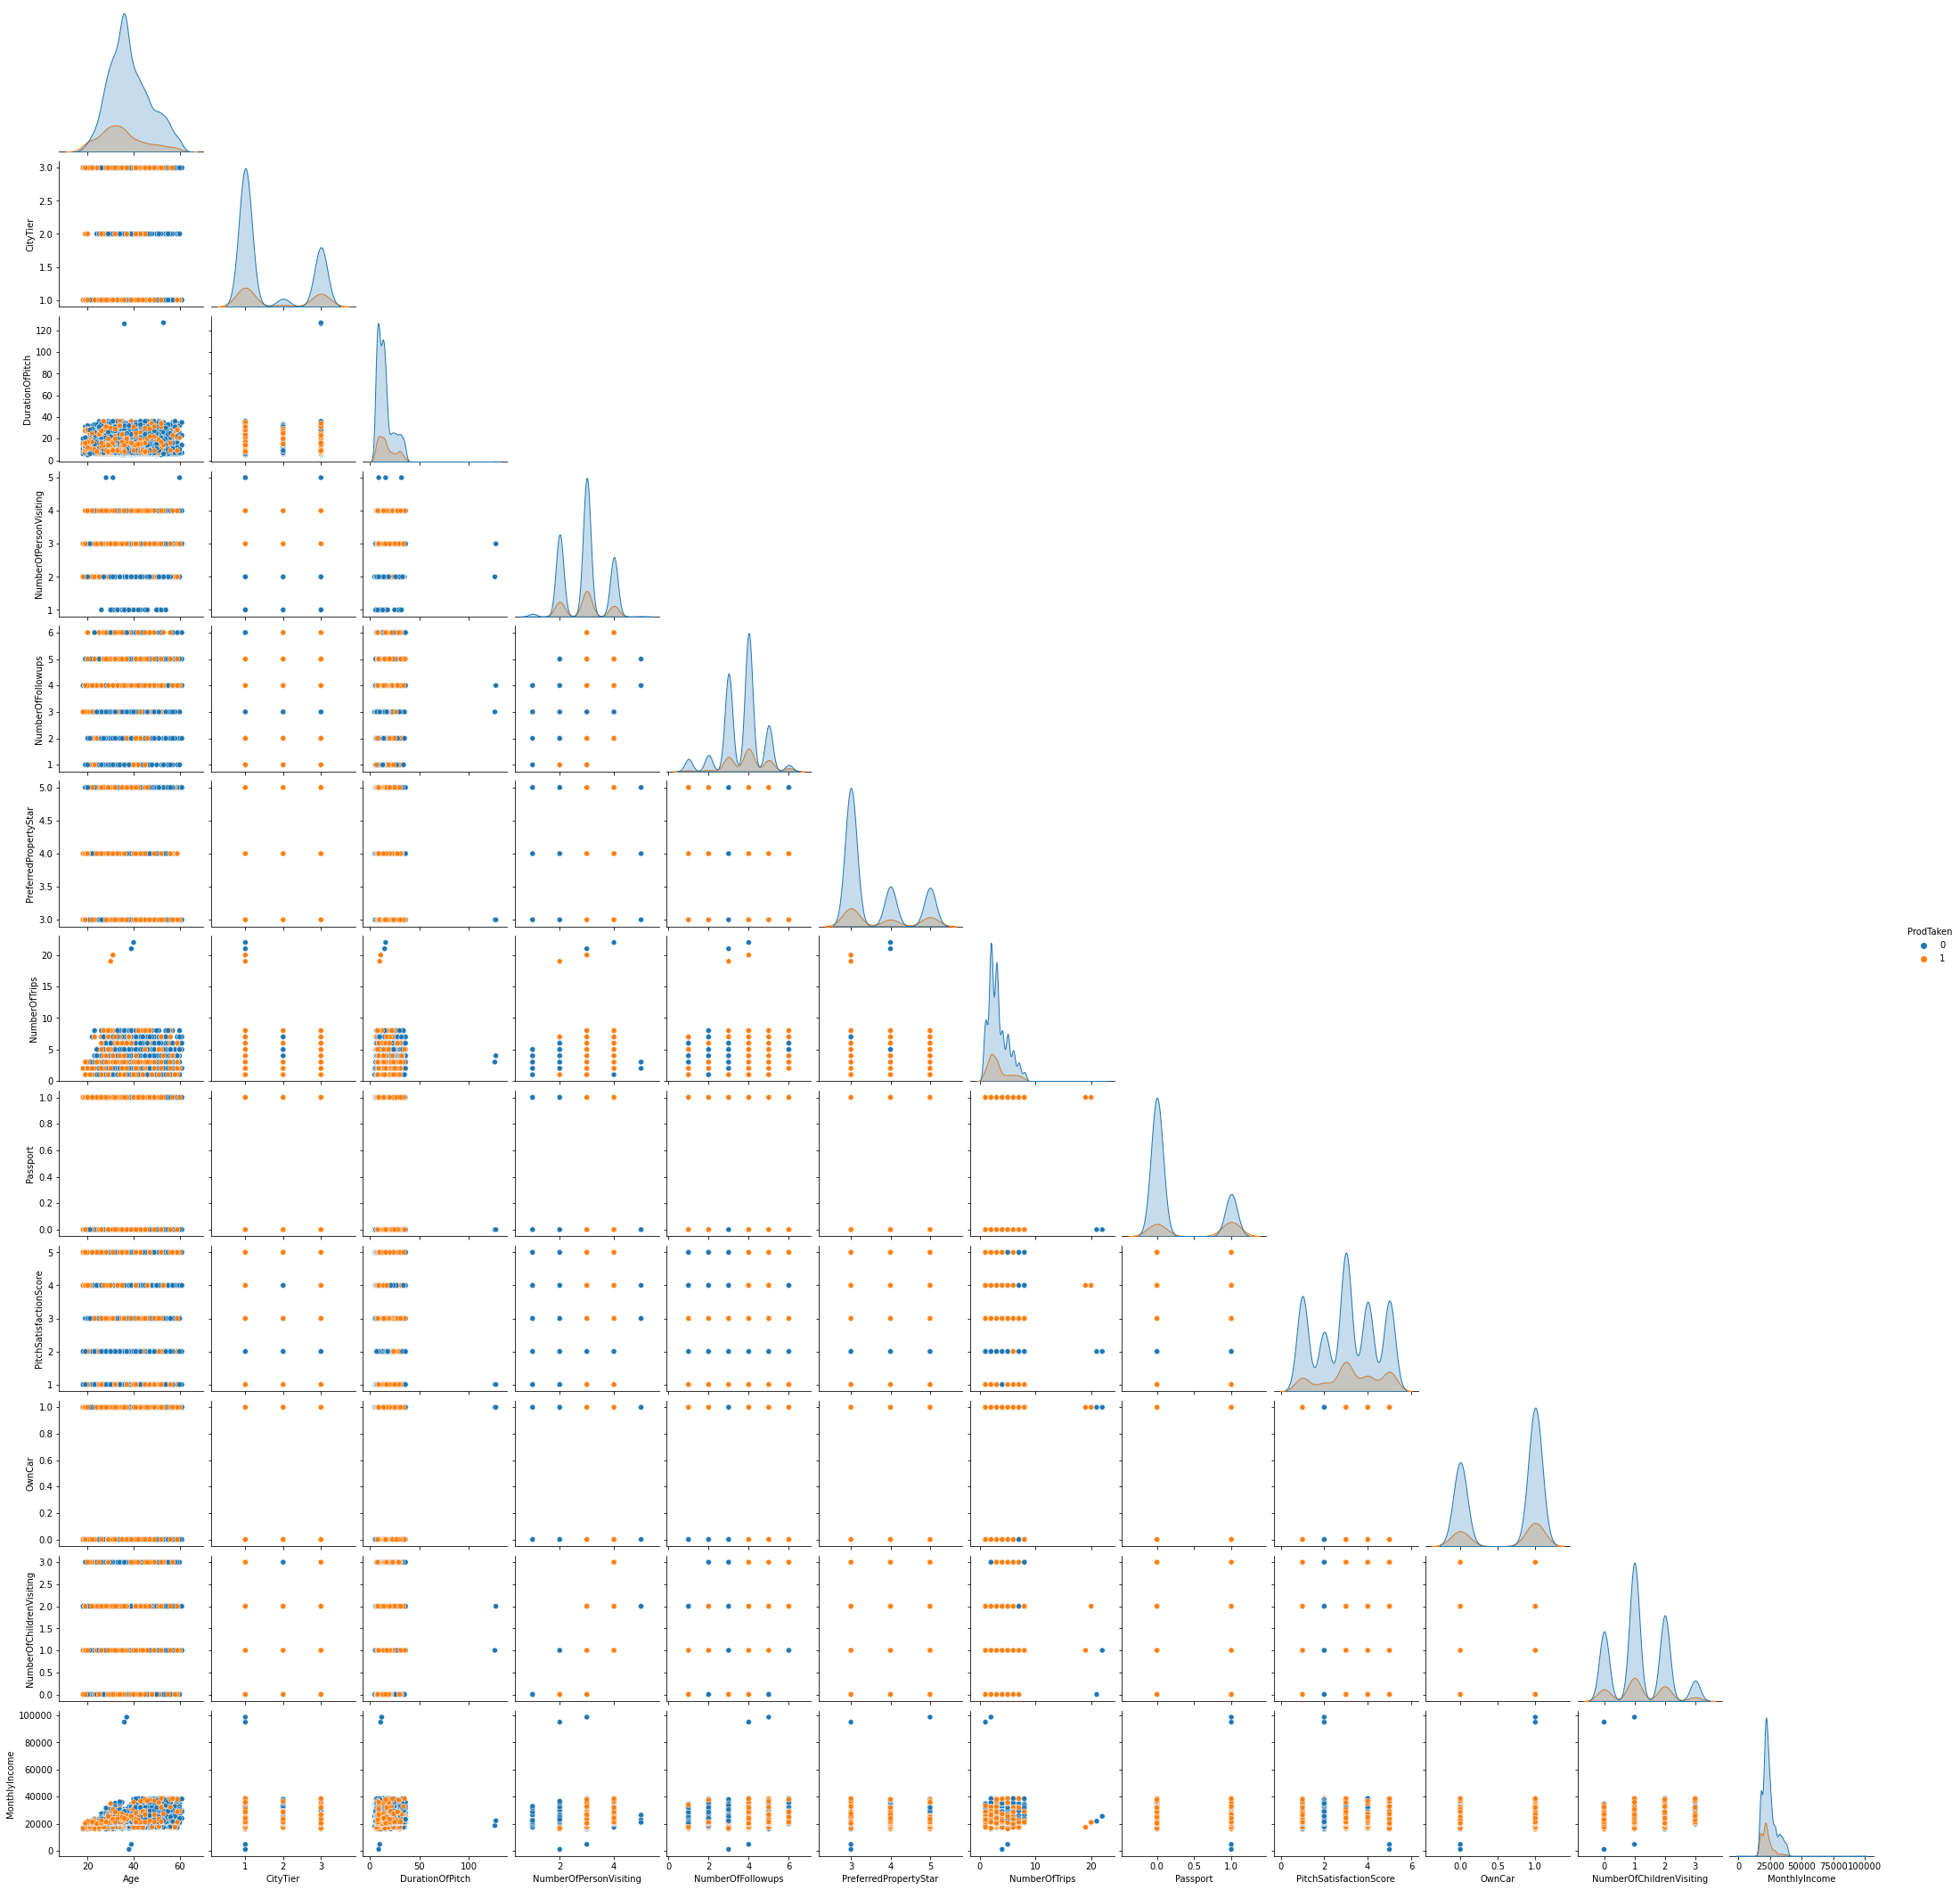

In [26]:
sns.pairplot(data, corner=True, hue='ProdTaken')
plt.show()

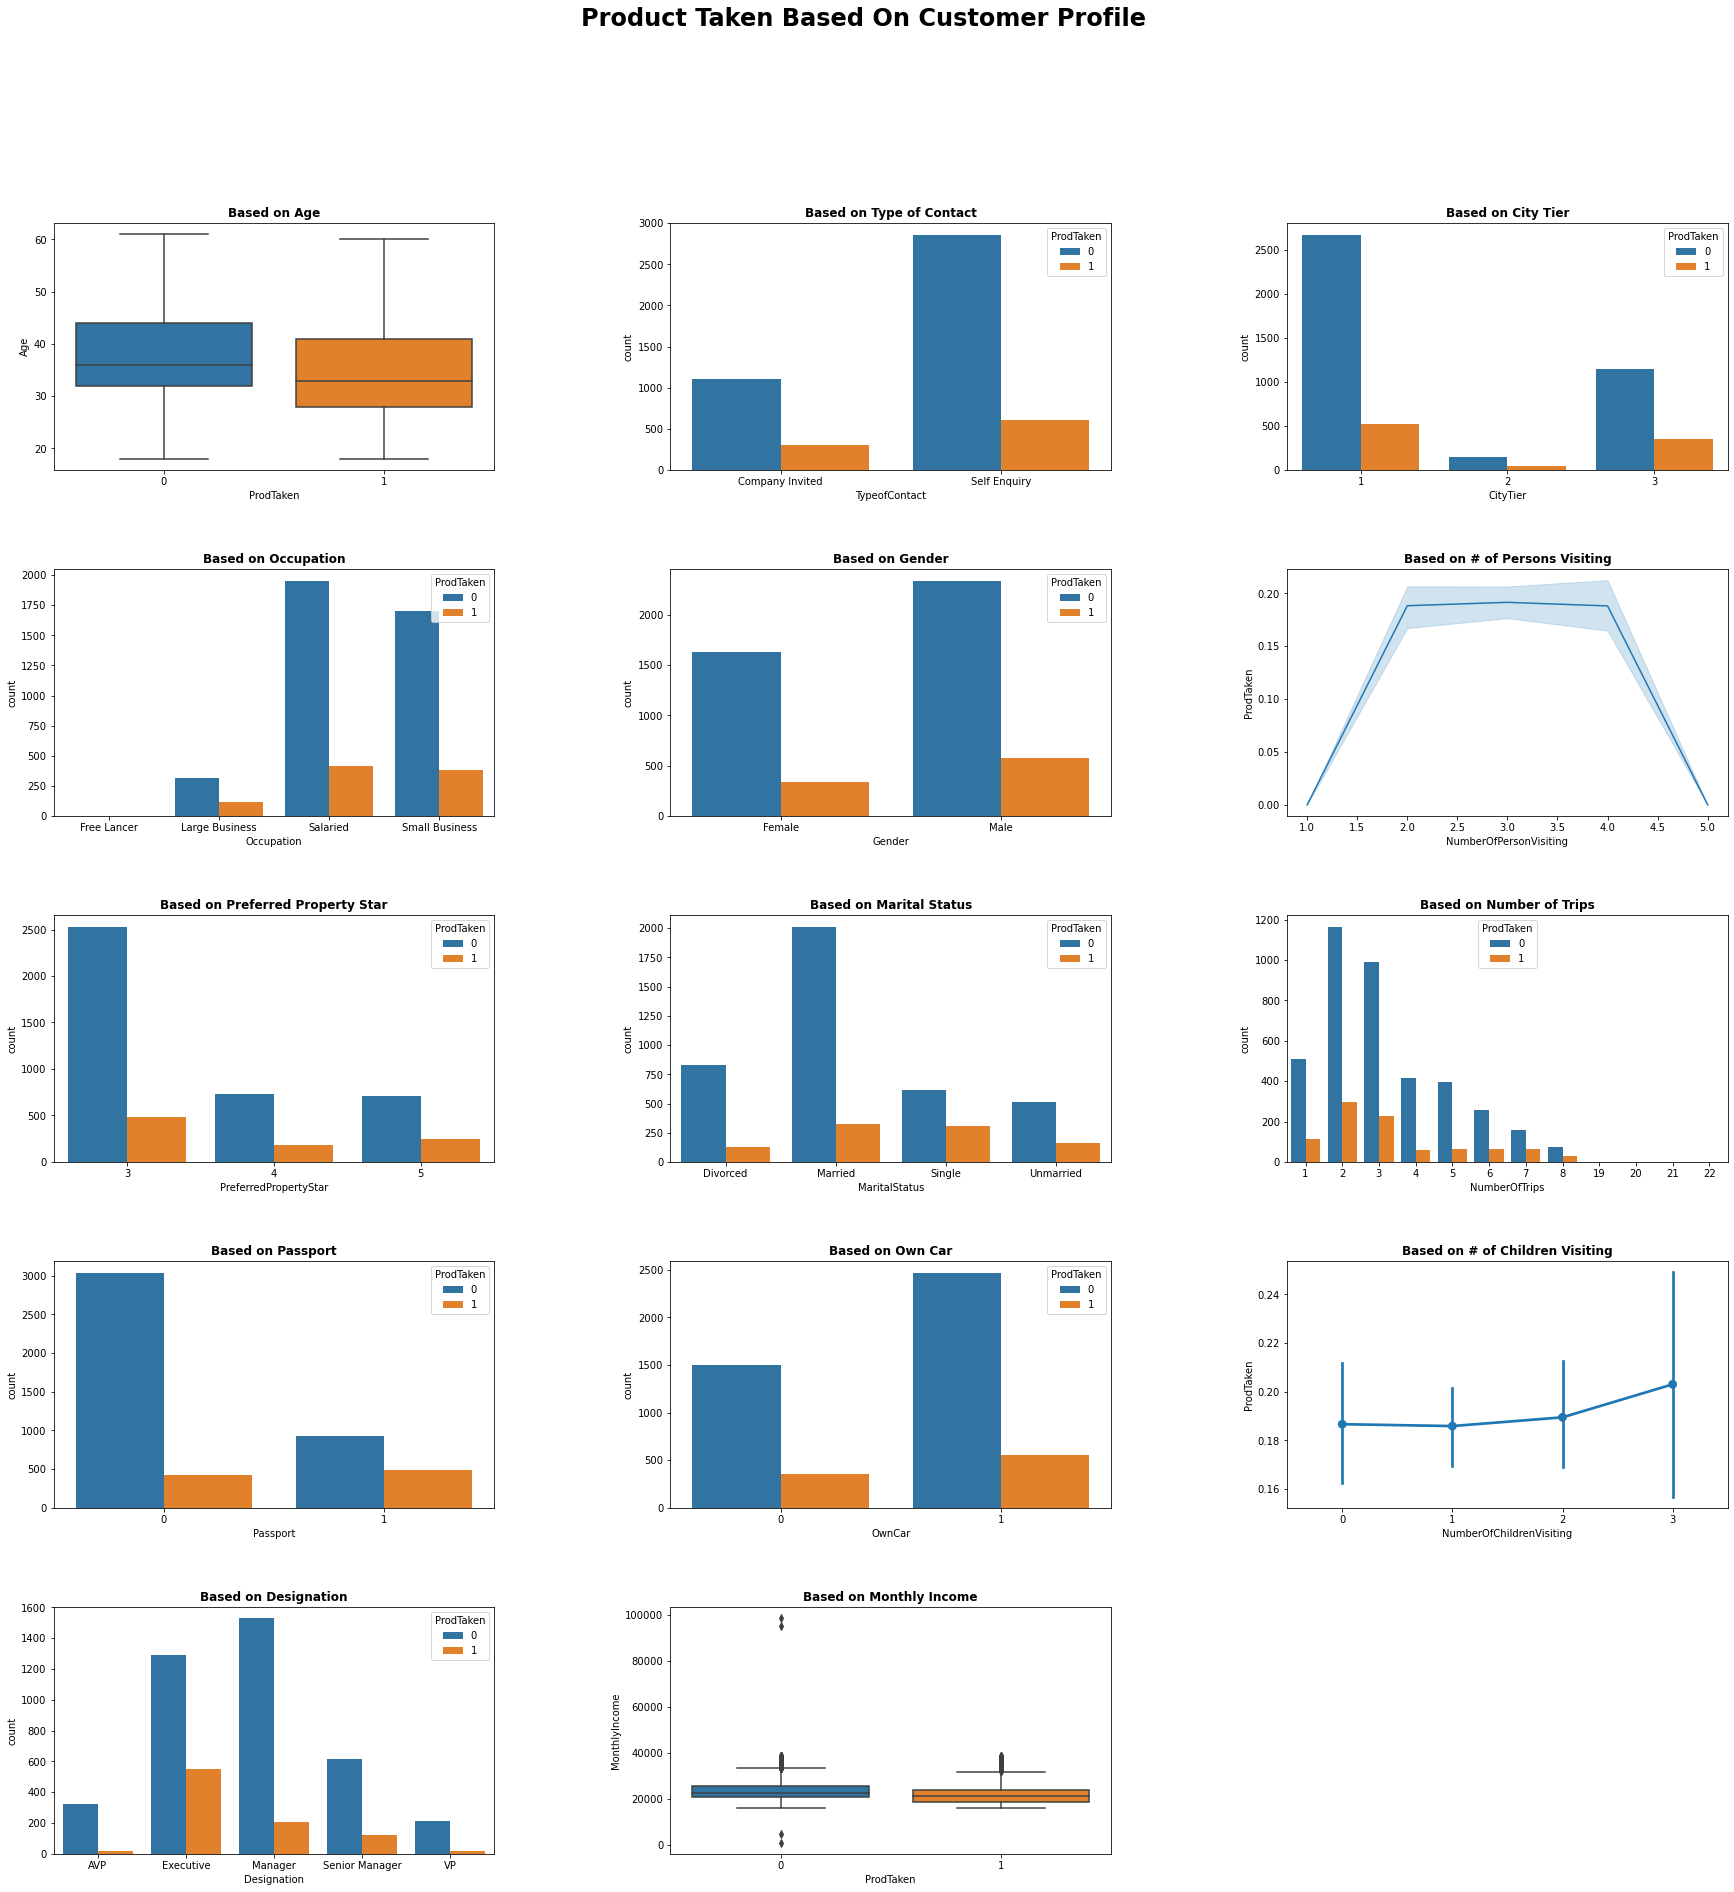

In [27]:
# create bivariate plots plotting impact of each independent variable on target variable Price 

# create 5x3-grid master plot with 14 subplots

mvplot1 = plt.figure(figsize=[30,30])
mvplot1.subplots_adjust(hspace=0.4, wspace=0.4)
mvplot1.suptitle("Product Taken Based On Customer Profile", fontweight='bold', fontsize='24')

mvfeat0 = mvplot1.add_subplot(5,3,1)
sns.boxplot(x='ProdTaken', y='Age', data=data, ax=mvfeat0);
mvfeat0.set_title('Based on Age', fontweight='bold')

mvfeat1 = mvplot1.add_subplot(5,3,2)
sns.countplot(x='TypeofContact', hue='ProdTaken', data=data, ax=mvfeat1);
mvfeat1.set_title('Based on Type of Contact', fontweight='bold')

mvfeat2 = mvplot1.add_subplot(5,3,3)
sns.countplot(x='CityTier', hue='ProdTaken', data=data, ax=mvfeat2);
mvfeat2.set_title('Based on City Tier', fontweight='bold')

mvfeat3 = mvplot1.add_subplot(5,3,4)
sns.countplot(x='Occupation', hue='ProdTaken', data=data, ax=mvfeat3);
mvfeat3.set_title('Based on Occupation', fontweight='bold')

mvfeat4 = mvplot1.add_subplot(5,3,5)
sns.countplot(x='Gender', hue='ProdTaken', data=data, ax=mvfeat4);
mvfeat4.set_title('Based on Gender', fontweight='bold')

mvfeat5 = mvplot1.add_subplot(5,3,6)
sns.lineplot(x='NumberOfPersonVisiting', y='ProdTaken', data=data, ax=mvfeat5);
mvfeat5.set_title('Based on # of Persons Visiting', fontweight='bold')

mvfeat6 = mvplot1.add_subplot(5,3,7)
sns.countplot(x='PreferredPropertyStar', hue='ProdTaken', data=data, ax=mvfeat6);
mvfeat6.set_title('Based on Preferred Property Star', fontweight='bold')

mvfeat7 = mvplot1.add_subplot(5,3,8)
sns.countplot(x='MaritalStatus', hue='ProdTaken', data=data, ax=mvfeat7);
mvfeat7.set_title('Based on Marital Status', fontweight='bold')

mvfeat8 = mvplot1.add_subplot(5,3,9)
sns.countplot(x='NumberOfTrips', hue='ProdTaken', data=data, ax=mvfeat8);
mvfeat8.set_title('Based on Number of Trips', fontweight='bold')

mvfeat9 = mvplot1.add_subplot(5,3,10)
sns.countplot(x='Passport', hue='ProdTaken', data=data, ax=mvfeat9);
mvfeat9.set_title('Based on Passport', fontweight='bold')

mvfeat10 = mvplot1.add_subplot(5,3,11)
sns.countplot(x='OwnCar', hue='ProdTaken', data=data, ax=mvfeat10);
mvfeat10.set_title('Based on Own Car', fontweight='bold')

mvfeat11 = mvplot1.add_subplot(5,3,12)
sns.pointplot(x='NumberOfChildrenVisiting', y='ProdTaken', data=data, ax=mvfeat11);
mvfeat11.set_title('Based on # of Children Visiting', fontweight='bold')

mvfeat12 = mvplot1.add_subplot(5,3,13)
sns.countplot(x='Designation', hue='ProdTaken', data=data, ax=mvfeat12);
mvfeat12.set_title('Based on Designation', fontweight='bold')

mvfeat13 = mvplot1.add_subplot(5,3,14)
sns.boxplot(x='ProdTaken', y='MonthlyIncome', data=data, ax=mvfeat13);
mvfeat13.set_title('Based on Monthly Income', fontweight='bold')

plt.show()

#### Observations
- Customers who took product are slightly younger though not significantly. 
- Customers who self-inquired are more inclined to take product. 
- Most customers who took the product come from City Tiers 1 and 3; need to understand why not many Tier 2 customers.
- Salaried professionals and small business owners more inclined to take product. 
- Higher percentage of males since heads of households most probably. 
- Customers traveling with 2-4 persons more inclined to take product.
- Customers who prefer 3 star properties tend to take the product over higher end customers.
- Married and single customers more inclined to take product over divorced/unmarried customers.
- Customers planning 2-3 trips annually are more inclined to select a package. 
- Passport does not make much of a difference in decision to take a product. 
- More children the higher the inclination to go with a package.
- Career designation titles are relative so difficult to make observation; but most are executives of some kind.
- Income not a major factor in decision to take a package. 

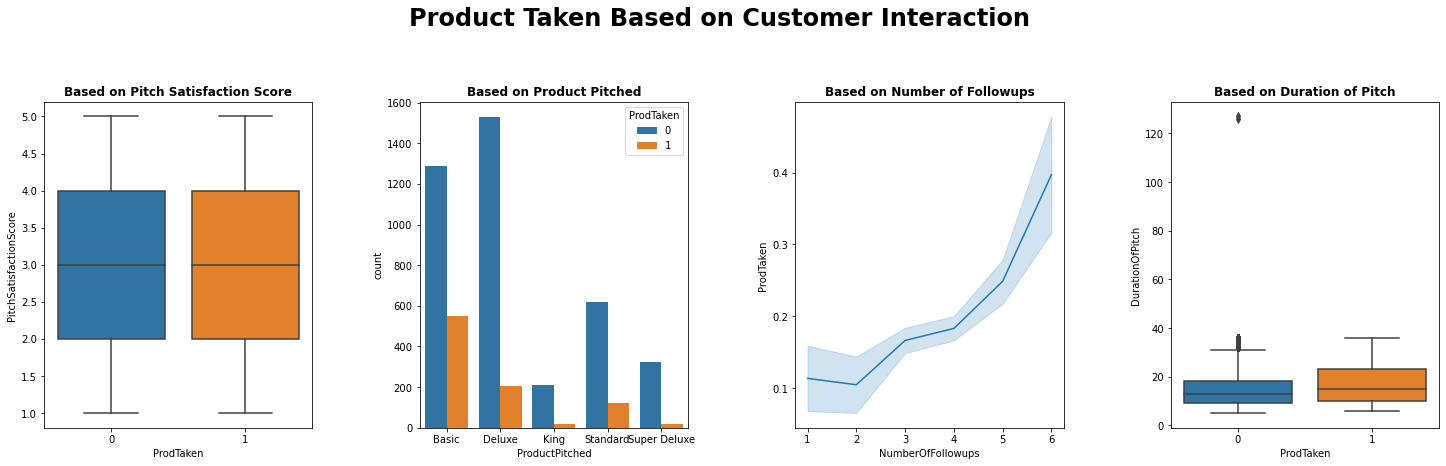

In [28]:
# create bivariate plots plotting impact of each independent variable on target variable Price 

# create 1x4-grid master plot with 4 subplots

mvplot2 = plt.figure(figsize=[25,6])
mvplot2.subplots_adjust(hspace=0.3, wspace=0.4)
mvplot2.suptitle("Product Taken Based on Customer Interaction", fontweight='bold', fontsize='24', y=1.1)

mvfeat14 = mvplot2.add_subplot(1,4,1)
sns.boxplot(x='ProdTaken', y='PitchSatisfactionScore', data=data, ax=mvfeat14);
mvfeat14.set_title('Based on Pitch Satisfaction Score', fontweight='bold')

mvfeat15 = mvplot2.add_subplot(1,4,2)
sns.countplot(x='ProductPitched', hue='ProdTaken', data=data, ax=mvfeat15);
mvfeat15.set_title('Based on Product Pitched', fontweight='bold')

mvfeat16 = mvplot2.add_subplot(1,4,3)
sns.lineplot(x='NumberOfFollowups', y='ProdTaken', data=data, ax=mvfeat16);
mvfeat16.set_title('Based on Number of Followups', fontweight='bold')

mvfeat17 = mvplot2.add_subplot(1,4,4)
sns.boxplot(x='ProdTaken', y='DurationOfPitch', data=data, ax=mvfeat17);
mvfeat17.set_title('Based on Duration of Pitch', fontweight='bold')

plt.show()

#### Observations
- Pitch satisfaction was average and had no impact on decision to take product. 
- Basic, Deluxe and Standard packages were pitched most.
- Strong correlation with customers taking products with more followups.
- Longer duration of pitch had higher inclination of customers taking a product. 

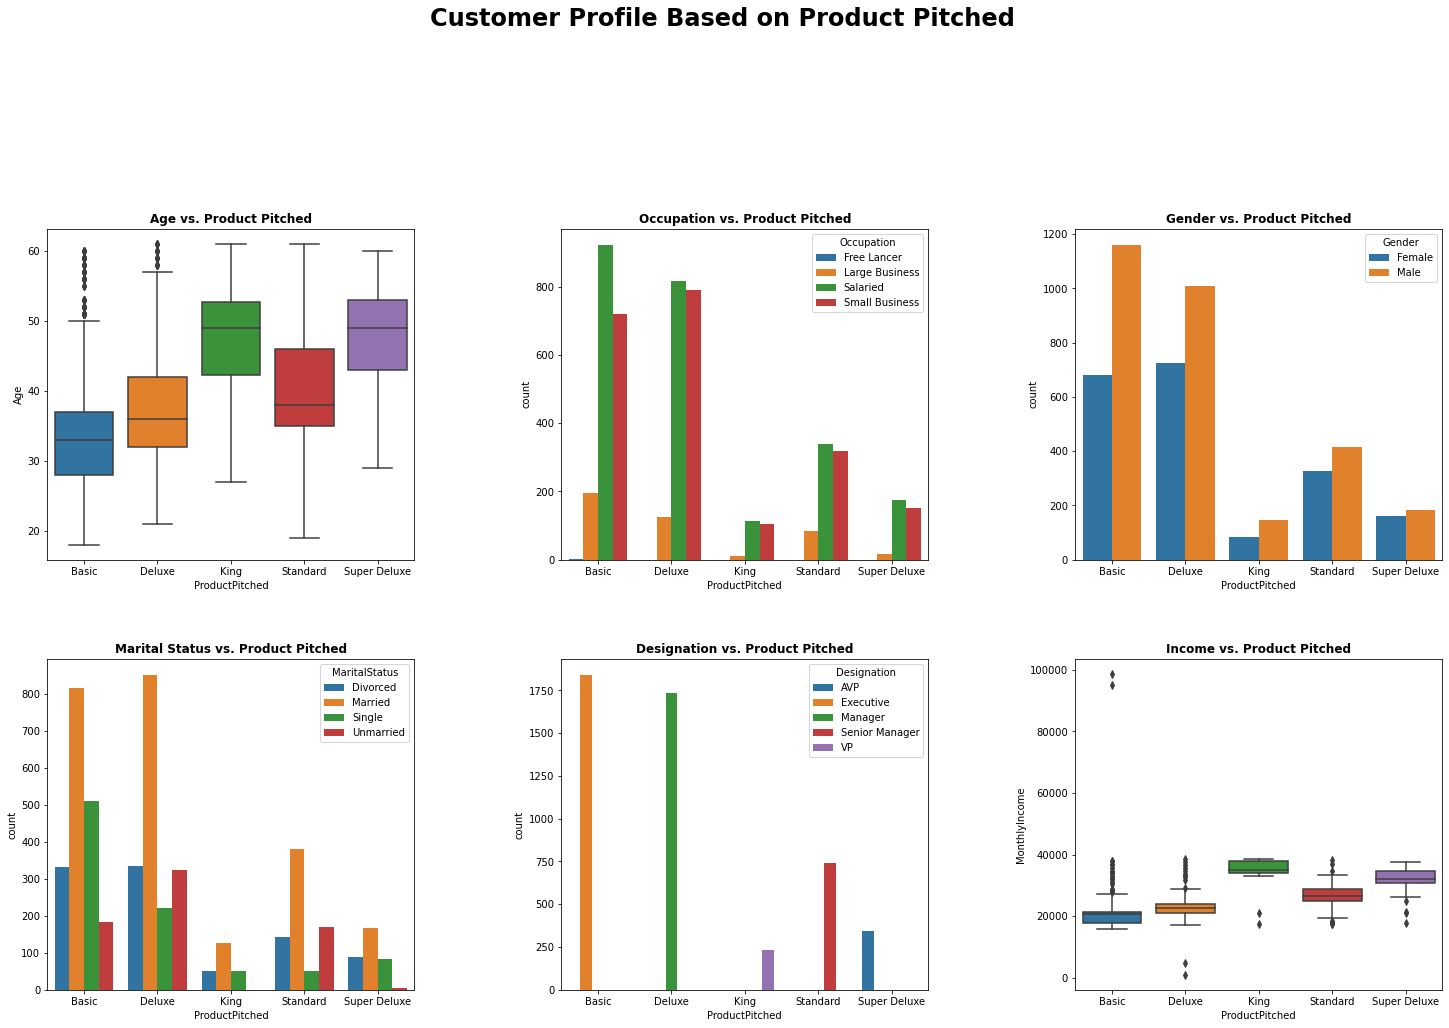

In [29]:
# create bivariate plots plotting customer profile by product pitched 

# create 2x3-grid master plot with 6 subplots

mvplot3 = plt.figure(figsize=[25,14])
mvplot3.subplots_adjust(hspace=0.3, wspace=0.4)
mvplot3.suptitle("Customer Profile Based on Product Pitched", fontweight='bold', fontsize='24', y=1.1)

mvfeat18 = mvplot3.add_subplot(2,3,1)
sns.boxplot(x='ProductPitched', y='Age', data=data)
mvfeat18.set_title('Age vs. Product Pitched', fontweight='bold')

mvfeat19 = mvplot3.add_subplot(2,3,2)
sns.countplot(x='ProductPitched', hue='Occupation', data=data, ax=mvfeat19);
mvfeat19.set_title('Occupation vs. Product Pitched', fontweight='bold')

mvfeat20 = mvplot3.add_subplot(2,3,3)
sns.countplot(x='ProductPitched', hue='Gender', data=data, ax=mvfeat20);
mvfeat20.set_title('Gender vs. Product Pitched', fontweight='bold')

mvfeat21 = mvplot3.add_subplot(2,3,4)
sns.countplot(x='ProductPitched', hue='MaritalStatus', data=data, ax=mvfeat21);
mvfeat21.set_title('Marital Status vs. Product Pitched', fontweight='bold')

mvfeat22 = mvplot3.add_subplot(2,3,5)
sns.countplot(x='ProductPitched', hue='Designation', data=data, ax=mvfeat22);
mvfeat22.set_title('Designation vs. Product Pitched', fontweight='bold')

mvfeat23 = mvplot3.add_subplot(2,3,6)
sns.boxplot(x='ProductPitched', y='MonthlyIncome', data=data, ax=mvfeat23);
mvfeat23.set_title('Income vs. Product Pitched', fontweight='bold')

plt.show()

#### Observations

#### Customer Profile Based on Product Package Pitched

1. Basic Package: Younger customers from 25-35 years old; predominantly single and/or married; fairly balanced between males and females; with incomes around 20000 per month; mainly salaried low level executives and/or small business owners. Prefer the lowest cost budget package. 

2. Deluxe Package: Middle-aged customers from 32-42 years old; predominantly married males who are likely the heads of households; monthly incomes are around 25000; most are salaried managers and/or small business owners.

3. Standard Package: Middle-aged customers from 35-45 years old; predominantly married males who are likely the heads of households; monthly incomes are around 30000; most are salaried senior managers and/or small business owners.

4. SuperDeluxe Package: Older mature well-established customers from 45-55 years old; predominantly married; fairly balanced between males and females; monthly incomes around 35000; most are AVPs and hold higher salaried positions and/or are also small business owners.

5. King Package: Older mature well-established customers from 45-55 years old; predominantly married; fairly balanced between males and females; monthly incomes around 40000; most are VPs and hold very high salaried positions and/or are also small business owners.

## Preparing Data for Modeling

### Model evaluation criterion

##### The model can make wrong predictions as:
- Case 1 - Predicting that a customer will take a product when they actually don't (Loss of Resource).
- Case 2 - Predicting that a customer will not take a product when they actually do (Loss of Opportunity).

##### Which case is more important? 
- Case 2 is more important since the objective is to effectively capture as many potential new customers who will select a package.

##### Which metric to optimize?
- Model objective is to minimize Loss of Opportunity (i.e. False Negatives) 
- Hence the correct metric to gauge model performance should be Recall.
- Since data is imbalanced it may not be advisable to use Accuracy.
- Therefore we need to maximize Recall and also keep an eye on improving Precision and F1 score.

#### Note:  
- We can drop Customer Interaction features such as PitchSatisfactionScore, ProductPitched, NumberOfFollowups and DurationOfPitch since it's safe to say that this data will not be available for new and potiental customers and therefore would not make sense to factor into the models.

In [30]:
# drop customer interation features
# create dummies for appropriate categorical variables while dropping the first one-hot encoded column
# separate target variable column

X = data.drop(['ProdTaken', 'PitchSatisfactionScore', 'ProductPitched', 'NumberOfFollowups', 'DurationOfPitch'], axis=1)
X = pd.get_dummies(X, drop_first=True)
y = data['ProdTaken']

In [31]:
# split data into training and testing set

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [32]:
# get shapes of training set and testing set
# get class breakdown in training set and testing set to check for imbalances. 

print("Shape of Training Set : ", X_train.shape)
print("Shape of Testing Set : ", X_test.shape)

print("Percentage of classes in Training Set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in Testing Set:")
print(y_test.value_counts(normalize=True))

Shape of Training Set :  (3421, 21)
Shape of Testing Set :  (1467, 21)
Percentage of classes in Training Set:
0    0.811751
1    0.188249
Name: ProdTaken, dtype: float64
Percentage of classes in Testing Set:
0    0.811861
1    0.188139
Name: ProdTaken, dtype: float64


In [33]:
# define function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn(model, predictors, target):

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [34]:
# define function to generate confusion matrix of a classification model built using sklearn

def confusion_matrix_sklearn(model, predictors, target):

    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")

## Bagging Models

### Decision Tree Classifier

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision     F1
0  0.867757  0.554348   0.683036  0.612


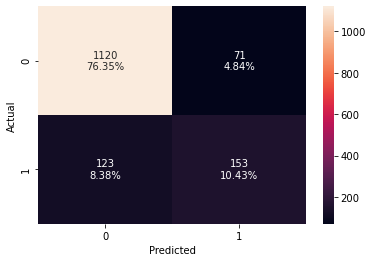

In [35]:
# fit the model
dtree = DecisionTreeClassifier(random_state=1, class_weight={0:0.19, 1:0.81})
dtree.fit(X_train,y_train)

# calculate different metrics
dtree_model_train_perf=model_performance_classification_sklearn(dtree,X_train,y_train)
print("Training performance:\n", dtree_model_train_perf)
dtree_model_test_perf=model_performance_classification_sklearn(dtree,X_test,y_test)
print("Testing performance:\n", dtree_model_test_perf)

# create confusion matrix
confusion_matrix_sklearn(dtree,X_test,y_test)

- The decision tree is overfitting the training data.
- Big disparity between training and testing set.
- Scores are poor on testing set. 

### Decision Tree Classifier - Hyperparameter Tuning

In [36]:
# Choose the type of classifier

dtree_tuned = DecisionTreeClassifier(class_weight={0:0.19,1:0.81},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': [1,4,7,10], 
              'min_samples_leaf': [2,6,10],
              'max_leaf_nodes' : [3,5,10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.19, 1: 0.81}, max_depth=7,
                       max_leaf_nodes=15, min_impurity_decrease=0.0001,
                       min_samples_leaf=2, random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.781643  0.652174   0.445387  0.529301
Testing performance:
    Accuracy   Recall  Precision        F1
0  0.782549  0.65942   0.447174  0.532943


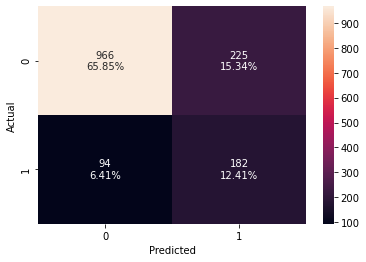

In [37]:
# calculate different metrics
dtree_tuned_model_train_perf=model_performance_classification_sklearn(dtree_tuned,X_train,y_train)
print("Training performance:\n",dtree_tuned_model_train_perf)
dtree_tuned_model_test_perf=model_performance_classification_sklearn(dtree_tuned,X_test,y_test)
print("Testing performance:\n",dtree_tuned_model_test_perf)

# create confusion matrix
confusion_matrix_sklearn(dtree_tuned,X_test,y_test)

- Recall improved slightly but Precision and F1 scores dropped.

### Random Forest Classifier

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.892297  0.492754   0.883117  0.632558


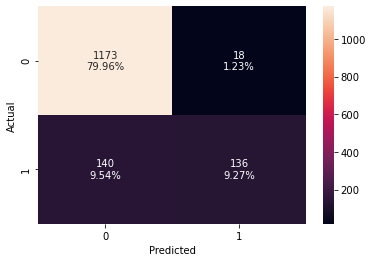

In [38]:
# fit the model
rfc = RandomForestClassifier(random_state=1)
rfc.fit(X_train,y_train)

# calculate different metrics
rfc_model_train_perf=model_performance_classification_sklearn(rfc,X_train,y_train)
print("Training performance:\n",rfc_model_train_perf)
rfc_model_test_perf=model_performance_classification_sklearn(rfc,X_test,y_test)
print("Testing performance:\n",rfc_model_test_perf)

# create confusion matrix
confusion_matrix_sklearn(rfc,X_test,y_test)

- Random Forest model is also overfitting the training data.

### Random Forest Classifier - Hyperparameter Tuning

In [39]:
# Choose the type of classifier. 
rfc_tuned = RandomForestClassifier(class_weight={0:0.19,1:0.81},random_state=1,oob_score=True,bootstrap=True)

parameters = {  
                "max_depth":[5,9,15],
                "n_estimators": [150,200,250,500],
                "min_samples_leaf": np.arange(5,10),
                "max_features": ['auto'],
                "max_samples": np.arange(0.3,0.5,0.7)}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rfc_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rfc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rfc_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, max_depth=15,
                       max_samples=0.3, min_samples_leaf=8, n_estimators=500,
                       oob_score=True, random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.845659  0.663043   0.578591  0.617945
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.839127  0.612319   0.567114  0.58885


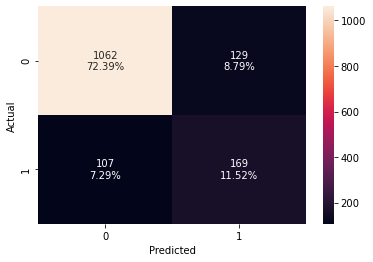

In [40]:
# calculate different metrics
rfc_tuned_model_train_perf=model_performance_classification_sklearn(rfc_tuned,X_train,y_train)
print("Training performance:\n",rfc_tuned_model_train_perf)
rfc_tuned_model_test_perf=model_performance_classification_sklearn(rfc_tuned,X_test,y_test)
print("Testing performance:\n",rfc_tuned_model_test_perf)

# create confusion matrix
confusion_matrix_sklearn(rfc_tuned,X_test,y_test)

- No significant improvement in scores after tuning Random Forest model. 

### Bagging Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.993277  0.965839   0.998395  0.981847
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.895706  0.528986   0.863905  0.65618


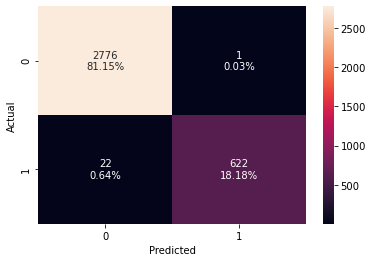

In [41]:
# fit the model
bgc = BaggingClassifier(random_state=1)
bgc.fit(X_train,y_train)

# calculate different metrics
bgc_model_train_perf=model_performance_classification_sklearn(bgc, X_train, y_train)
print("Training performance:\n", bgc_model_train_perf)
bgc_model_test_perf=model_performance_classification_sklearn(bgc, X_test, y_test)
print("Testing performance:\n", bgc_model_test_perf)

# create confusion matrix
confusion_matrix_sklearn(bgc, X_train, y_train)

- Bagging model slight better, but still overfitting the training data.
- Model performance on testing set is not good. 

### Bagging Classifier - Hyperparameter Tuning

In [42]:
# Choose the type of classifier. 
bgc_tuned = BaggingClassifier(DecisionTreeClassifier(), random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bgc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bgc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bgc_tuned.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_features=0.9,
                  max_samples=0.9, n_estimators=50, random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.999708  0.998447        1.0  0.999223
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.908657  0.557971   0.927711  0.696833


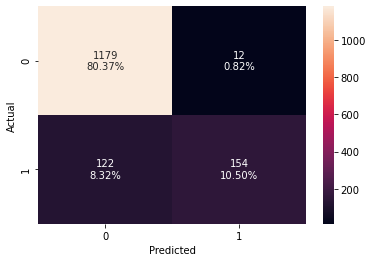

In [43]:
# calculate different metrics
bgc_tuned_model_train_perf=model_performance_classification_sklearn(bgc_tuned, X_train, y_train)
print("Training performance:\n", bgc_tuned_model_train_perf)
bgc_tuned_model_test_perf=model_performance_classification_sklearn(bgc_tuned, X_test, y_test)
print("Testing performance:\n", bgc_tuned_model_test_perf)

# create confusion matrix
confusion_matrix_sklearn(bgc_tuned, X_test, y_test)

- No significant improvement in scores after tuning Bagging model. 

## Boosting Models

### AdaBoost Classifier

Training performance:
    Accuracy    Recall  Precision       F1
0  0.845075  0.281056   0.729839  0.40583
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.838446  0.282609   0.666667  0.396947


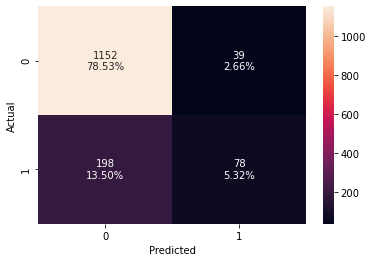

In [44]:
# fit the model
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

# calculate different metrics
abc_model_train_perf=model_performance_classification_sklearn(abc, X_train, y_train)
print("Training performance:\n", abc_model_train_perf)
abc_model_test_perf=model_performance_classification_sklearn(abc, X_test, y_test)
print("Testing performance:\n", abc_model_test_perf)

# create confusion matrix
confusion_matrix_sklearn(abc, X_test, y_test)

- Though model performance is poor, there is no overfitting on training set. 
- And much less disparity between training and testing dataset.

### AdaBoost Classifier - Hyperparameter Tuning

In [45]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,50,100),
    "learning_rate":np.arange(0.1,1,0.1)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.7000000000000001, n_estimators=10,
                   random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0   0.86729  0.402174   0.789634  0.532922
Testing performance:
    Accuracy   Recall  Precision        F1
0  0.854124  0.34058   0.746032  0.467662


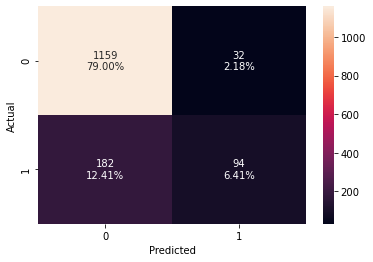

In [46]:
# calculate different metrics
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned, X_train, y_train)
print("Training performance:\n", abc_tuned_model_train_perf)
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned, X_test, y_test)
print("Testing performance:\n", abc_tuned_model_test_perf)

# create confusion matrix
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

- Recall increased slightly after tuning AdaBoost model though still quite low. 

### Gradient Boosting Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.879275  0.427019   0.862069  0.571132
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.864349  0.380435   0.789474  0.513447


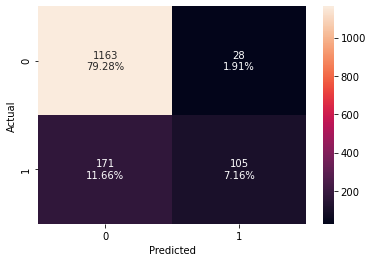

In [47]:
# fit the model
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train, y_train)

# calculate different metrics
gbc_model_train_perf=model_performance_classification_sklearn(gbc, X_train, y_train)
print("Training performance:\n", gbc_model_train_perf)
gbc_model_test_perf=model_performance_classification_sklearn(gbc, X_test, y_test)
print("Testing performance:\n", gbc_model_test_perf)

# create confusion matrix
confusion_matrix_sklearn(gbc, X_test, y_test)

- Less disparity between training and testing dataset.
- Recall is still low however. 

### Gradient Boosting Classifier - Hyperparameter Tuning

In [48]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1), random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=250, random_state=1,
                           subsample=0.9)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.906752  0.557453   0.913486  0.692382
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.880027  0.452899   0.833333  0.586854


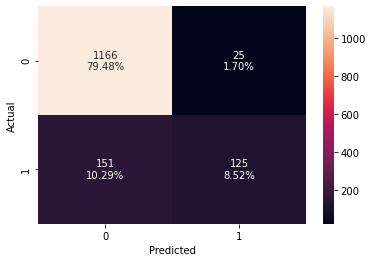

In [49]:
# calculate different metrics
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned, X_train, y_train)
print("Training performance:\n", gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned, X_test, y_test)
print("Testing performance:\n", gbc_tuned_model_test_perf)

# create confusion matrix
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

- Recall increased slightly, however still quite low for model performance. 

### XGBoost Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.995908  0.978261        1.0  0.989011
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.895706  0.568841    0.82199  0.672377


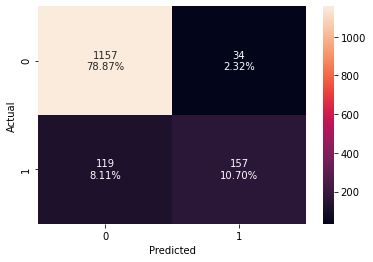

In [50]:
# fit the model
xgbc = XGBClassifier(random_state=1, eval_metric='logloss')
xgbc.fit(X_train,y_train)

# calculate different metrics
xgbc_model_train_perf=model_performance_classification_sklearn(xgbc, X_train, y_train)
print("Training performance:\n", xgbc_model_train_perf)
xgbc_model_test_perf=model_performance_classification_sklearn(xgbc, X_test, y_test)
print("Testing performance:\n", xgbc_model_test_perf)

# create confusion matrix
confusion_matrix_sklearn(xgbc, X_test, y_test)

- XGBoost baseline model is overfitting the training data.
- Much disparity between training and testing set. 

### XGBoost Classifier - Hyperparameter Tuning

In [51]:
# Choose the type of classifier. 
xgbc_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgbc_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgbc_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=5, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

Training performance:
    Accuracy    Recall  Precision        F1
0   0.94563  0.981366   0.784119  0.871724
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.862304  0.724638   0.613497  0.664452


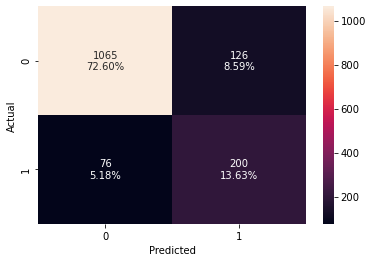

In [52]:
# calculate different metrics
xgbc_tuned_model_train_perf=model_performance_classification_sklearn(xgbc_tuned, X_train, y_train)
print("Training performance:\n", xgbc_tuned_model_train_perf)
xgbc_tuned_model_test_perf=model_performance_classification_sklearn(xgbc_tuned, X_test, y_test)
print("Testing performance:\n", xgbc_tuned_model_test_perf)

# create confusion matrix
confusion_matrix_sklearn(xgbc_tuned, X_test, y_test)

- XGBoost model Recall score improved significantly after tuning.
- Though Precision also dropped somewhat. 

### Stacking Classifier

In [53]:
estimators = [('Decision Tree Tuned', dtree_tuned), ('Random Forest Tuned', rfc_tuned), ('AdaBoost Tuned',abc_tuned), ('Gradient Boosting Tuned', gbc_tuned)]
final_estimator = xgbc

stkc = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
stkc.fit(X_train, y_train)

StackingClassifier(estimators=[('Decision Tree Tuned',
                                DecisionTreeClassifier(class_weight={0: 0.19,
                                                                     1: 0.81},
                                                       max_depth=7,
                                                       max_leaf_nodes=15,
                                                       min_impurity_decrease=0.0001,
                                                       min_samples_leaf=2,
                                                       random_state=1)),
                               ('Random Forest Tuned',
                                RandomForestClassifier(class_weight={0: 0.19,
                                                                     1: 0.81},
                                                       max_depth=15,
                                                       max_samples=0.3,
                                                       min_s

Training performance:
    Accuracy    Recall  Precision       F1
0  0.898275  0.600932   0.809623  0.68984
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.857532  0.471014   0.673575  0.554371


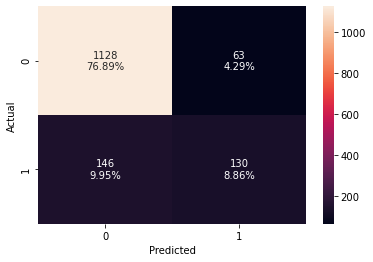

In [54]:
# calculate different metrics
stkc_model_train_perf=model_performance_classification_sklearn(stkc, X_train, y_train)
print("Training performance:\n", stkc_model_train_perf)
stkc_model_test_perf=model_performance_classification_sklearn(stkc, X_test, y_test)
print("Testing performance:\n", stkc_model_test_perf)

# create confusion matrix
confusion_matrix_sklearn(stkc, X_test, y_test)

- Stacking models don't show much improvement. 

## Comparing All Models

In [55]:
# training performance comparison of all models

models_train_comp_df = pd.concat(
    [dtree_model_train_perf.T, dtree_tuned_model_train_perf.T, rfc_model_train_perf.T, rfc_tuned_model_train_perf.T,
     bgc_model_train_perf.T, bgc_tuned_model_train_perf.T, abc_model_train_perf.T,abc_tuned_model_train_perf.T, 
     gbc_model_train_perf.T, gbc_tuned_model_train_perf.T, xgbc_model_train_perf.T, xgbc_tuned_model_train_perf.T,
     stkc_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree Classifier",
    "Decision Tree Classifier Tuned",
    "Random Forest Classifier",
    "Random Forest Classifier Tuned",
    "Bagging Classifier",
    "Bagging Classifier Tuned",
    "Adaboost Classifier",
    "Adaboost Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Training Performance Comparison:")
models_train_comp_df

Training Performance Comparison:


,Decision Tree Classifier,Decision Tree Classifier Tuned,Random Forest Classifier,Random Forest Classifier Tuned,Bagging Classifier,Bagging Classifier Tuned,Adaboost Classifier,Adaboost Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.781643,1.0,0.845659,0.993277,0.999708,0.845075,0.867290,0.879275,0.906752,0.995908,0.945630,0.898275
Recall,1.0,0.652174,1.0,0.663043,0.965839,0.998447,0.281056,0.402174,0.427019,0.557453,0.978261,0.981366,0.600932
Precision,1.0,0.445387,1.0,0.578591,0.998395,1.000000,0.729839,0.789634,0.862069,0.913486,1.000000,0.784119,0.809623
F1,1.0,0.529301,1.0,0.617945,0.981847,0.999223,0.405830,0.532922,0.571132,0.692382,0.989011,0.871724,0.689840


In [56]:
# testing performance comparison of all models

models_test_comp_df = pd.concat(
    [dtree_model_test_perf.T, dtree_tuned_model_test_perf.T, rfc_model_test_perf.T, rfc_tuned_model_test_perf.T,
     bgc_model_test_perf.T, bgc_tuned_model_test_perf.T, abc_model_test_perf.T,abc_tuned_model_test_perf.T, 
     gbc_model_test_perf.T, gbc_tuned_model_test_perf.T, xgbc_model_test_perf.T, xgbc_tuned_model_test_perf.T,
     stkc_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree Classifier",
    "Decision Tree Classifier Tuned",
    "Random Forest Classifier",
    "Random Forest Classifier Tuned",
    "Bagging Classifier",
    "Bagging Classifier Tuned",
    "Adaboost Classifier",
    "Adaboost Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Testing Performance Comparison:")
models_test_comp_df

Testing Performance Comparison:


,Decision Tree Classifier,Decision Tree Classifier Tuned,Random Forest Classifier,Random Forest Classifier Tuned,Bagging Classifier,Bagging Classifier Tuned,Adaboost Classifier,Adaboost Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.867757,0.782549,0.892297,0.839127,0.895706,0.908657,0.838446,0.854124,0.864349,0.880027,0.895706,0.862304,0.857532
Recall,0.554348,0.659420,0.492754,0.612319,0.528986,0.557971,0.282609,0.340580,0.380435,0.452899,0.568841,0.724638,0.471014
Precision,0.683036,0.447174,0.883117,0.567114,0.863905,0.927711,0.666667,0.746032,0.789474,0.833333,0.821990,0.613497,0.673575
F1,0.612000,0.532943,0.632558,0.588850,0.656180,0.696833,0.396947,0.467662,0.513447,0.586854,0.672377,0.664452,0.554371


#### Observations
- XGBoost Tuned model seems to give the best Recall score, though Precision and F1 are not satisfactory. 
- Perhaps XGBoost model can be tweaked and tuned to find the best combination of parameters to maximize metric scores.
- Stacking model surprisingly did not give good performance. 

### Feature Importance of XGBoost Tuned Model

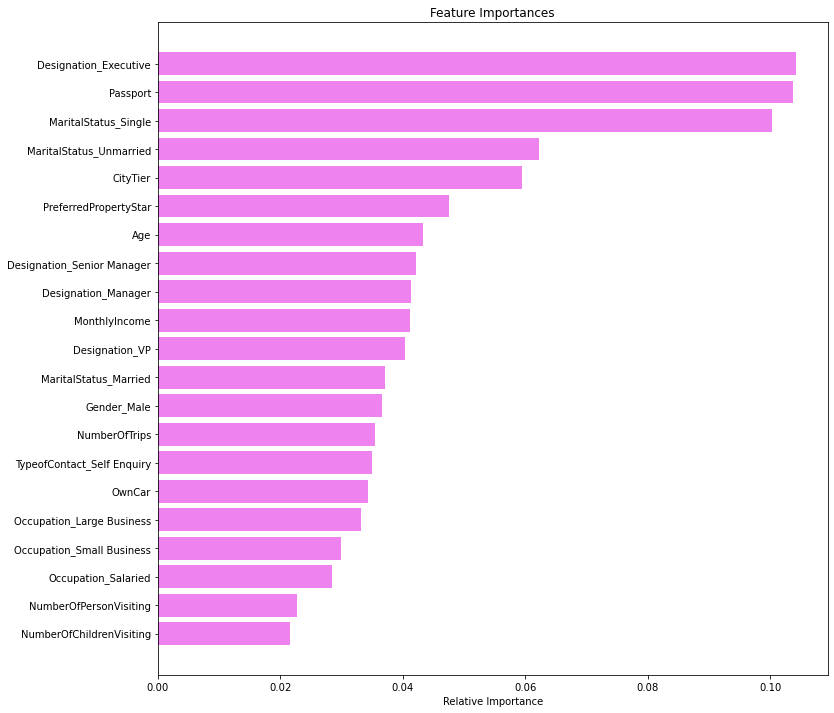

In [57]:
# list features by importance

feature_names = X_train.columns
importances = xgbc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Observations
- Most important features are Designation, Passport, Marital Status and City Tier.
- Surprising Monthly Income is not that important of a feature.
- Number of Persons and Children Visiting are not that important to the models.

## Conclusion

### Insights
- Most important features are Designation, Passport, Marital Status and City Tier. 
- Surprisingly Monthly Income is not that important of a feature.
- Number of Persons and Children Visiting are not that important to the models.

### Recommendations
- Target customer base should be young professionals that are at the start of their careers having disposable incomes and are single or newly married (without children), and more importantly already have Passports. This customer segment naturally enjoys traveling and would be more inclined to accepting a package.
- Customers with small children below the age of 5 will be less inclined to travel due to higher expense, logistical challenges and lack of childcare.
- To improve chances of customers buying a product, company should increase duration of pitch (sweet spot is around 30 minutes) and follow through after the pitch with multiple followups.
- Develop a program to incentivize new, potential customers to get Passports. Having passports will increase chances of potential customers purchasing a package. 
- For those customers that don't have passports, create and promote a selection of travel packages aimed at domestic destinations and local itineraries.